In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.corpus import stopwords

from sklearn import preprocessing
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabrinaskaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("spam_text.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Label Encoding

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

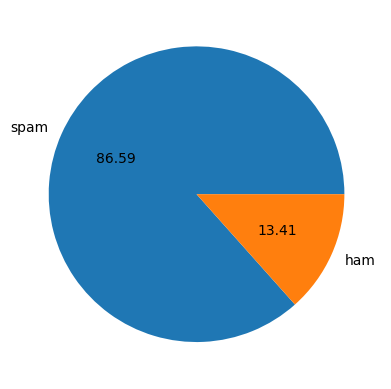

In [7]:
plt.pie(df['Category'].value_counts(),labels=['spam','ham'],autopct='%0.2f')
plt.show()

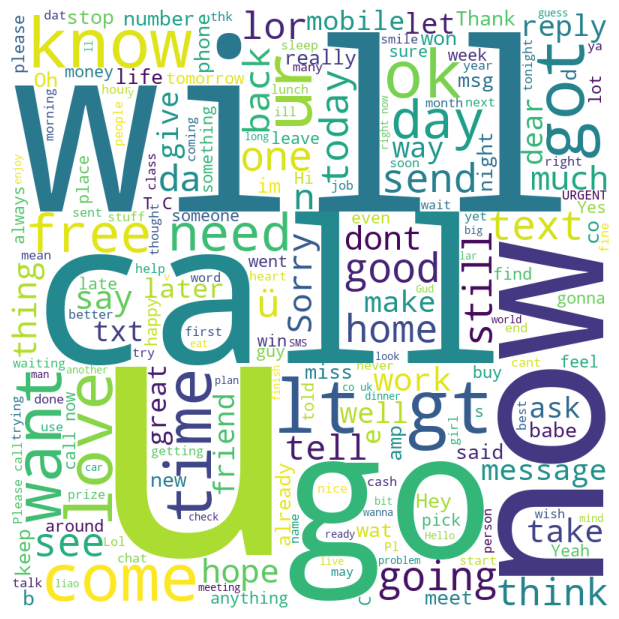

In [9]:
msg = "".join(df.Message)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(msg)


# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [22]:
stop_words = stopwords.words('english')

def text_preprocessing(text):
    if pd.isna(text):
        return ""
    
    text = str(text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = " ".join(
        word for word in text.split()
        if word not in stop_words
    )
    return text

In [30]:
df['Message_clean'] = df['Message'].apply(text_preprocessing)
df[['Message', 'Message_clean']].head()

,Message,Message_clean
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


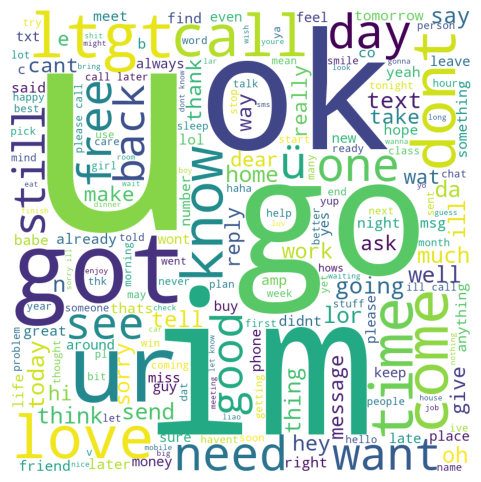

In [31]:
msg_clean = " ".join(df['Message_clean'])

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10
).generate(msg_clean)

plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
X = df['Message_clean']
y = df['Category']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [34]:
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [35]:
pipeline_nb.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [38]:
y_pred = pipeline_nb.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

Accuracy : 0.9632286995515695
Precision: 1.0
Recall   : 0.7248322147651006
F1-Score : 0.8404669260700389


In [39]:
print(classification_report(
    y_test,
    y_pred,
    target_names=['ham', 'spam']
))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



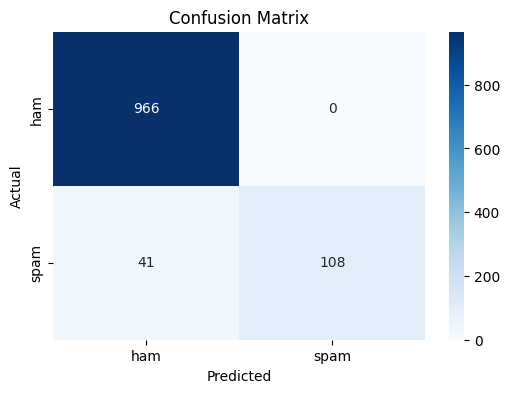

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['ham','spam'],
    yticklabels=['ham','spam']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
contoh_pesan = [
    "Congratulations! You won a free voucher",
    "Please attend the meeting at 10 AM tomorrow"
]

contoh_pesan_clean = [text_preprocessing(text) for text in contoh_pesan]

prediksi = pipeline_nb.predict(contoh_pesan_clean)

for text, label in zip(contoh_pesan, prediksi):
    print("Pesan   :", text)
    print("Prediksi:", "Spam" if label == 1 else "Ham")
    print("============================================")

Pesan   : Congratulations! You won a free voucher
Prediksi: Spam
Pesan   : Please attend the meeting at 10 AM tomorrow
Prediksi: Ham


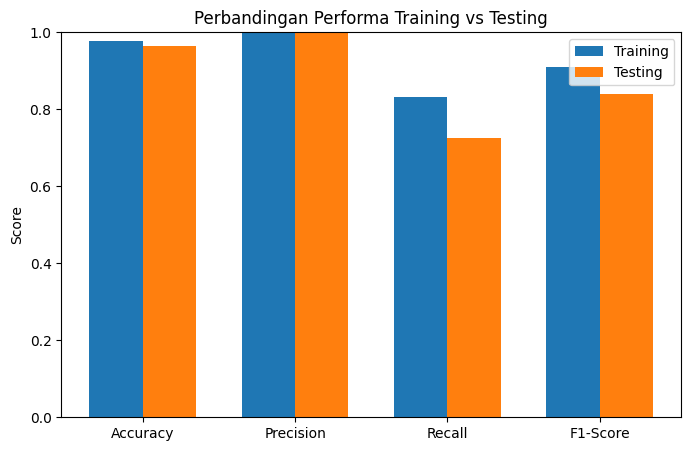

In [44]:
# Prediksi data training
y_train_pred = pipeline_nb.predict(X_train)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

# Precision
train_prec = precision_score(y_train, y_train_pred)
test_prec = precision_score(y_test, y_pred)

# Recall
train_rec = recall_score(y_train, y_train_pred)
test_rec = recall_score(y_test, y_pred)

# F1 Score
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_acc, train_prec, train_rec, train_f1]
test_scores = [test_acc, test_prec, test_rec, test_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_scores, width, label='Training')
plt.bar(x + width/2, test_scores, width, label='Testing')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Perbandingan Performa Training vs Testing')
plt.legend()
plt.show()